In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ProdNet import ARIO

# Set simulation values
T = 100
N = 5
n = np.ones(N) * 3
tau = np.ones(N) * 3
p_cap = np.ones(N) * 12

# Create initial interfirm flow matrix Z
Z = np.array([[0,2,0,4,2],
              [1,0,3,0,2],
              [2,6,0,0,1],
              [6,1,2,0,0],
              [2,1,1,0,0]])

# Set final demand vector
C = np.full((T, N), 1)

# Compute corresponding technical coefficient matrix
A = Z / (np.sum(Z, axis=1) + C[0, :]).reshape((1, N))

# Set initial inventory level to optimal one
S0 = Z * n

# Set production shock
p_shock = np.zeros((T, N))
p_shock[10:12, 2:3] = 0.6

In [2]:
#Initialize model
model = ARIO(T=T, N=N, A=A, n=n, tau=tau, p_cap=p_cap)

In [3]:
model.simulate(S0, C, p_shock)

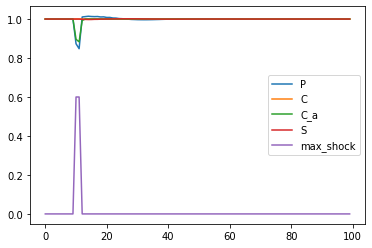

In [4]:
# Show results 

# Total production
x = model.P.sum(axis=1)
x = x / x[0]
plt.plot(x, label='P')

# Consumption
x = model.C.sum(axis=1)
x = x / x[0]
plt.plot(x, label='C')

# Actual consumption
x = model.C_a.sum(axis=1)
x = x / x[0]
plt.plot(x, label='C_a')

# Inventory (measured as mean percentage of desired one)
with np.errstate(divide='ignore', invalid='ignore'):
    x = model.S / S0
x = np.nanmean(x, axis=(1, 2))
plt.plot(x, label='S')

# Largest shock size
x = np.max(model.p_shock, axis=1)
plt.plot(x, label='max_shock')

plt.legend()
plt.show()